In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)


In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_images = '/content/drive/MyDrive/머신러닝과제/딥러닝/train/images'
val_images = '/content/drive/MyDrive/머신러닝과제/딥러닝/valid/images'
test_images = '/content/drive/MyDrive/머신러닝과제/딥러닝/test/images'
train_labels = '/content/drive/MyDrive/머신러닝과제/딥러닝/train/labels'
val_labels = '/content/drive/MyDrive/머신러닝과제/딥러닝/valid/labels'
test_labels = '/content/drive/MyDrive/머신러닝과제/딥러닝/test/labels'

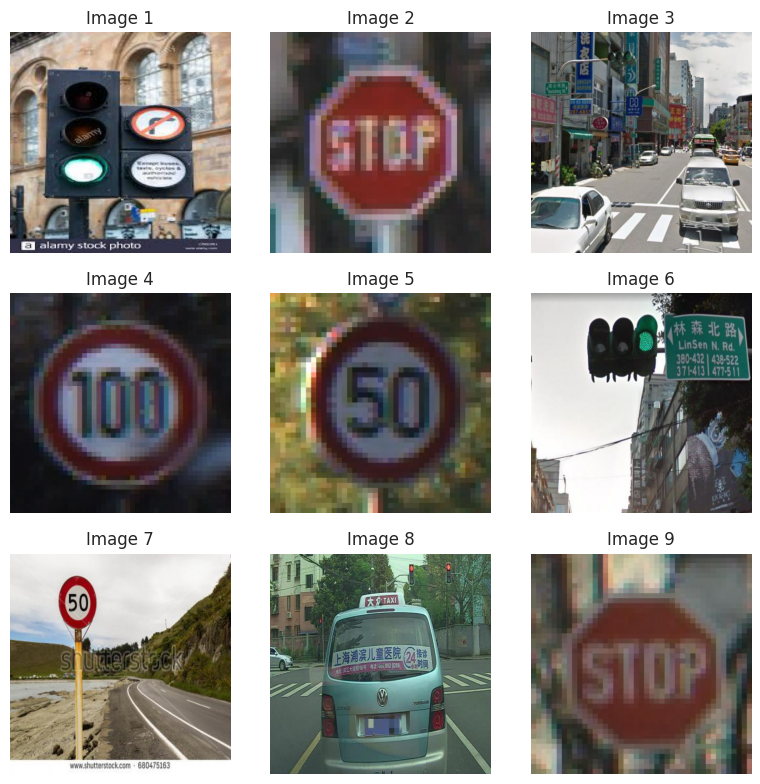

In [ ]:
num_samples = 9
image_files = os.listdir(train_images)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(train_images, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 6.23M/6.23M [00:00<00:00, 52.6MB/s]



image 1/1 /content/drive/MyDrive/머신러닝과제/딥러닝/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 244.9ms
Speed: 7.2ms preprocess, 244.9ms inference, 1656.4ms postprocess per image at shape (1, 3, 416, 416)


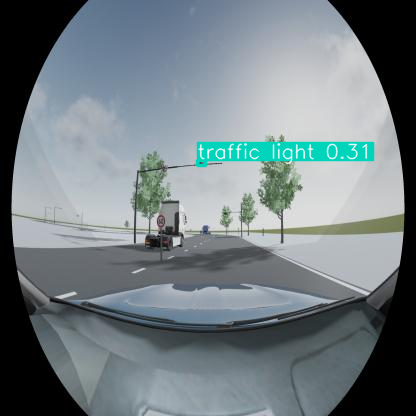

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Use the model to detect object
image = "/content/drive/MyDrive/머신러닝과제/딥러닝/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 /content/drive/MyDrive/머신러닝과제/딥러닝/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 Green Light, 1 Red Light, 1 Speed Limit 60, 99.1ms
Speed: 1.2ms preprocess, 99.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)


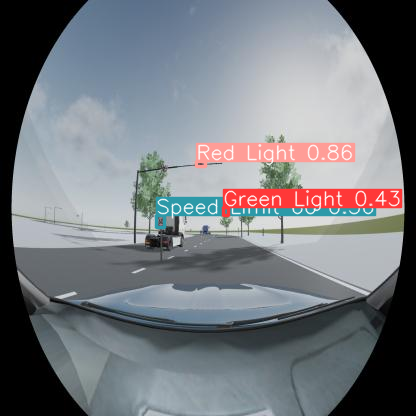

In [ ]:
# Use a pretrained YOLOv8n model
best_pt = '/content/drive/MyDrive/머신러닝과제/딥러닝/best.pt'
model = YOLO(best_pt)

# Use the model to detect object
image = "/content/drive/MyDrive/머신러닝과제/딥러닝/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# valid

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

In [ ]:
# 모델 초기화 및 사전 학습된 가중치 로드
Final_model = YOLO(best_pt)

# 모델 학습
Result_Final_model = Final_model.train(
    data="/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml",  # 데이터셋 경로
    epochs=15,  # 에포크 수 증가
    imgsz=416,  # 입력 이미지 크기
    batch=64,  # 배치 크기 조정
    lr0=0.00005,  # 초기 학습률
    dropout=0.20,  # 드롭아웃 확률
    device=0,  # GPU 사용
    patience=5,  # 얼리스탑핑 설정
    save_period=1, # 1 에포크마다 체크포인트 저장
    optimizer='RMSprop'
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [ ]:
# 모델 초기화 및 사전 학습된 가중치 로드
Final_model = YOLO(best_pt)

# 모델 학습
Result_Final_model = Final_model.train(
    data="/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml",  # 데이터셋 경로
    epochs=15,  # 에포크 수 증가
    imgsz=416,  # 입력 이미지 크기
    batch=32,  # 배치 크기 조정
    lr0=0.0001,  # 초기 학습률
    dropout=0.30,  # 드롭아웃 확률
    device=0,  # GPU 사용
    patience=3  # 얼리스탑핑 설정
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/머신러닝과제/딥러닝/best.pt, data=/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml, epochs=15, time=None, patience=3, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/train/labels... 3539 images, 35 backgrounds, 0 corrupt: 100%|██████████| 3571/3571 [49:45<00:00,  1.20it/s]


train: New cache created: /content/drive/MyDrive/머신러닝과제/딥러닝/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [10:58<00:00,  1.22it/s]


val: New cache created: /content/drive/MyDrive/머신러닝과제/딥러닝/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.04G     0.6308      1.109     0.9696         25        416: 100%|██████████| 112/112 [01:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]

                   all        801        944       0.92      0.822      0.893      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         2G     0.6067     0.9492     0.9574         38        416: 100%|██████████| 112/112 [00:57<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all        801        944      0.903      0.776      0.876      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         2G     0.6149     0.9362     0.9517         47        416: 100%|██████████| 112/112 [00:56<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        801        944      0.879      0.793      0.852       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         2G      0.623     0.9295     0.9551         41        416: 100%|██████████| 112/112 [00:55<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        801        944      0.889      0.806      0.877      0.748
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



4 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]


                   all        801        944       0.92      0.822      0.893      0.769
           Green Light         87        122       0.78      0.541      0.684      0.371
             Red Light         74        108      0.855      0.603      0.695      0.405
       Speed Limit 100         52         52      0.887      0.903      0.942      0.857
       Speed Limit 110         17         17      0.884      0.765      0.891      0.822
       Speed Limit 120         60         60       0.91      0.967      0.982      0.879
        Speed Limit 20         56         56          1      0.907      0.984      0.857
        Speed Limit 30         71         74       0.96      0.919       0.95      0.884
        Speed Limit 40         53         55      0.936      0.909      0.968      0.833
        Speed Limit 50         68         71       0.89      0.775      0.899        0.8
        Speed Limit 60         76         76          1      0.842       0.92      0.837
        Speed Limit 7

# 테스트 섹션

In [ ]:
import torch.optim as optim

In [ ]:
#노멀 결과

# 모델 초기화 및 사전 학습된 가중치 로드
Final_model = YOLO(best_pt)

# 모델 학습(노멀)
Result_Final_model = Final_model.train(
    data="/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml",  # 데이터셋 경로
    epochs=15,  # 에포크 수 증가
    imgsz=416,  # 입력 이미지 크기
    batch=32,  # 배치 크기 조정
    lr0=0.0001,  # 초기 학습률
    dropout=0.20,  # 드롭아웃 확률
    device=0,  # GPU 사용
    patience=3  # 얼리스탑핑 설정
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/머신러닝과제/딥러닝/best.pt, data=/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml, epochs=15, time=None, patience=3, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/train/labels.cache... 3539 images, 35 backgrounds, 0 corrupt: 100%|██████████| 3571/3571 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.07G     0.6308      1.109     0.9696         25        416: 100%|██████████| 112/112 [01:34<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.17it/s]

                   all        801        944       0.92      0.822      0.893      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.03G     0.6067     0.9492     0.9574         38        416: 100%|██████████| 112/112 [01:00<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all        801        944      0.903      0.776      0.876      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.03G     0.6149     0.9362     0.9517         47        416: 100%|██████████| 112/112 [00:57<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.879      0.793      0.852       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.03G      0.623     0.9295     0.9551         41        416: 100%|██████████| 112/112 [00:54<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]

                   all        801        944      0.889      0.806      0.877      0.748
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



4 epochs completed in 0.092 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.02it/s]


                   all        801        944       0.92      0.822      0.893      0.769
           Green Light         87        122       0.78      0.541      0.684      0.371
             Red Light         74        108      0.855      0.603      0.695      0.405
       Speed Limit 100         52         52      0.887      0.903      0.942      0.857
       Speed Limit 110         17         17      0.884      0.765      0.891      0.822
       Speed Limit 120         60         60       0.91      0.967      0.982      0.879
        Speed Limit 20         56         56          1      0.907      0.984      0.857
        Speed Limit 30         71         74       0.96      0.919       0.95      0.884
        Speed Limit 40         53         55      0.936      0.909      0.968      0.833
        Speed Limit 50         68         71       0.89      0.775      0.899        0.8
        Speed Limit 60         76         76          1      0.842       0.92      0.837
        Speed Limit 7

In [ ]:
# 아담 결과(22분)
Result = model.train(
    data="/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml",
    epochs=20,                  # 추가로 20 에포크 학습
    imgsz=416,
    batch=64,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='Adam'
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/머신러닝과제/딥러닝/best.pt, data=/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml, epochs=20, time=None, patience=4, batch=64, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train533, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/train/labels.cache... 3539 images, 35 backgrounds, 0 corrupt: 100%|██████████| 3571/3571 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


In [ ]:
# 모델 학습이 완료된 후 가중치를 저장
Final_model.save('/content/drive/MyDrive/머신러닝과제/딥러닝/trained_model.pt')

In [ ]:
Result = model.train(
    data="/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml",
    epochs=30,                  # 추가로 20 에포크 학습
    imgsz=416,
    batch=64,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='RMSProp'
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/머신러닝과제/딥러닝/best.pt, data=/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml, epochs=30, time=None, patience=4, batch=64, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train53, exist_ok=False, pretrained=True, optimizer=RMSProp, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

train: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/train/labels.cache... 3539 images, 35 backgrounds, 0 corrupt: 100%|██████████| 3571/3571 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/머신러닝과제/딥러닝/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train53/labels.jpg... 
optimizer: RMSprop(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train53
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.91G      1.537      3.703      1.895         58        416: 100%|██████████| 56/56 [00:59<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.80s/it]


                   all        801        944      0.718     0.0693     0.0106     0.0026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.88G     0.9441      2.139      1.179         66        416: 100%|██████████| 56/56 [01:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.11s/it]


                   all        801        944     0.0346      0.175     0.0367     0.0214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.88G     0.8454      1.872      1.085         57        416: 100%|██████████| 56/56 [00:55<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]


                   all        801        944     0.0807      0.645      0.181      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.88G     0.7673      1.705      1.029         57        416: 100%|██████████| 56/56 [00:56<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.20s/it]


                   all        801        944      0.319      0.212      0.154     0.0829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.88G     0.7435      1.539      1.017         56        416: 100%|██████████| 56/56 [00:55<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


                   all        801        944      0.258       0.17      0.121     0.0793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.88G     0.7132      1.381     0.9908         59        416: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        801        944      0.239      0.184      0.156     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.88G     0.7065      1.268     0.9942         67        416: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]

                   all        801        944      0.264      0.285      0.198      0.117
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



7 epochs completed in 0.140 hours.
Optimizer stripped from runs/detect/train53/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train53/weights/best.pt, 6.2MB

Validating runs/detect/train53/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.30s/it]


                   all        801        944     0.0813      0.646      0.181      0.136
           Green Light         87        122     0.0259     0.0738     0.0429     0.0152
             Red Light         74        108     0.0648      0.148     0.0595     0.0159
       Speed Limit 100         52         52    0.00937      0.827      0.274      0.231
       Speed Limit 110         17         17      0.011      0.647     0.0633     0.0492
       Speed Limit 120         60         60    0.00149        0.8      0.208      0.154
        Speed Limit 20         56         56      0.127      0.339      0.102     0.0826
        Speed Limit 30         71         74    0.00286      0.959      0.211      0.172
        Speed Limit 40         53         55     0.0108      0.691     0.0679     0.0434
        Speed Limit 50         68         71     0.0149      0.789      0.107     0.0845
        Speed Limit 60         76         76    0.00211      0.829      0.154      0.123
        Speed Limit 7

In [ ]:
# 아담 결과(22분)
Result = model.train(
    data="/content/drive/MyDrive/머신러닝과제/딥러닝/data.yaml",
    epochs=20,                  # 추가로 20 에포크 학습
    imgsz=416,
    batch=64,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='AdamW'
)